In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [2]:
from google.colab import files 
data = files.upload()

Saving Unemployment_Rate_Monthly.csv to Unemployment_Rate_Monthly.csv


In [3]:
df = pd.read_csv('Unemployment_Rate_Monthly.csv',parse_dates=[' Date'])

In [4]:
df['Date']=pd.to_datetime(df[' Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766 entries, 0 to 1765
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    1766 non-null   object        
 1    Date                                     1766 non-null   datetime64[ns]
 2    Frequency                                1766 non-null   object        
 3    Estimated Unemployment Rate (%)          1766 non-null   float64       
 4    Estimated Employed                       1766 non-null   int64         
 5    Estimated Labour Participation Rate (%)  1766 non-null   float64       
 6   Date                                      1766 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 96.7+ KB


In [6]:
df.drop([' Date',' Frequency'],axis=1,inplace=True)

In [7]:
df.head()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Date
0,Andhra Pradesh,17.91,20626291,62.67,2016-01-31
1,Andhra Pradesh,9.98,19334918,53.50,2016-02-29
2,Andhra Pradesh,10.72,19646970,54.73,2016-03-31
3,Andhra Pradesh,5.51,18929583,49.76,2016-04-30
4,Andhra Pradesh,6.29,21163390,56.02,2016-05-31


In [8]:
df.tail()

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Date
1761,India,6.89,398213434,40.43,2021-02-28
1762,India,6.50,398145073,40.17,2021-03-31
1763,India,7.97,390790128,39.98,2021-04-30
1764,India,11.90,375458641,40.04,2021-05-31
1765,India,9.17,383287653,39.57,2021-06-30


In [9]:
df= df[df['Region'] == 'India']

In [10]:
fig = px.line(df, x=df.index, y=' Estimated Unemployment Rate (%)', title='IND unemployment rate')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [11]:
df=df.set_index('Date')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01bdf64e10>,
      dtype=object)

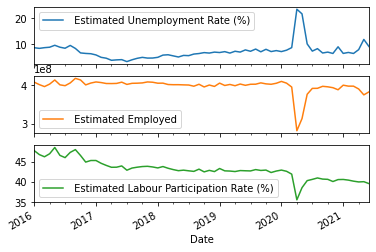

In [12]:
df.plot(subplots=True)

In [13]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  66
Columns  :  4

Features : 
 ['Region', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']

Missing values :   Region                                      False
 Estimated Unemployment Rate (%)            False
 Estimated Employed                         False
 Estimated Labour Participation Rate (%)    False
dtype: bool

Unique values :  
 Region                                       1
 Estimated Unemployment Rate (%)            62
 Estimated Employed                         66
 Estimated Labour Participation Rate (%)    60
dtype: int64


In [14]:
print ("\nMissing values :  ", df.isnull().any())


Missing values :   Region                                      False
 Estimated Unemployment Rate (%)            False
 Estimated Employed                         False
 Estimated Labour Participation Rate (%)    False
dtype: bool


In [15]:
df = df.resample('M').mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01bd8e8050>,
      dtype=object)

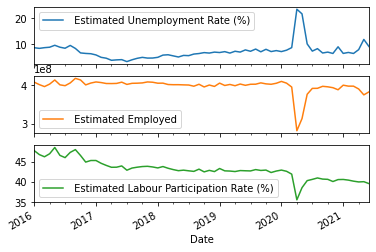

In [16]:
df.plot(subplots=True)

In [18]:
def isStationaryKPSS(stats, p, critical_values):
    print(f'Test Statistics: {stats}')
    print(f'p-value: {p}')
    print(f'Critial Values: {critical_values}')

    if p < 0.05 :
        print('Series is not Stationary')
    else:
        print('Series is Stationary')

In [19]:
stats, p, lags, critical_values = kpss(df[' Estimated Unemployment Rate (%)'])
isStationaryKPSS(stats, p, critical_values)

Test Statistics: 0.25381953620916703
p-value: 0.1
Critial Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



In [17]:
df_2020 = df[(df.index.get_level_values(0)) >= '2020-01-01']

In [21]:
stats, p, lags, critical_values = kpss(df_2020[' Estimated Unemployment Rate (%)'])
isStationaryKPSS(stats, p, critical_values)

Test Statistics: 0.24629788957186616
p-value: 0.1
Critial Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



In [19]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 7.7 MB/s 
     |████████████████████████████████| 9.5 MB 49.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [20]:
import pmdarima as pm


In [21]:
model = pm.auto_arima(df[' Estimated Unemployment Rate (%)'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4,error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=346.173, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=343.669, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=306.368, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=307.112, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=464.444, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=305.472, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=306.264, Time=0.08 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=303.326, Time=0.05 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=304.142, Time=0.18 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=303.998, Time=0.10 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=307.167, Time=0.58 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=301.754, Time=0.07 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=302.458, Time=0.36 sec
 ARIMA(3,0,0)(0,0,1)[12] intercept   

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   66
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -145.877
Date:                Mon, 09 Aug 2021   AIC                            301.754
Time:                        10:50:26   BIC                            312.702
Sample:                             0   HQIC                           306.080
                                 - 66                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3648      1.843      1.283      0.199      -1.247       5.976
ar.L1          0.9007      0.361      2.493      0.013       0.192       1.609
ar.L2         -0.4498      0.334     -1.346      0.178      -1.105       0.205
ar.L3          0.2316      0.238      0.973      0.330      -0.235       0.698
sigma2         4.8022      0.421     11.401      0.000       3.977       5.628
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3011.49
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              13.98   Skew:                             4.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
df

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Date,,,
2016-01-31,8.72,408609380,47.70
2016-02-29,8.46,402169984,46.72
2016-03-31,8.73,397037060,46.18
2016-04-30,8.90,403488712,46.92
2016-05-31,9.65,414185605,48.47
...,...,...,...
2021-02-28,6.89,398213434,40.43
2021-03-31,6.50,398145073,40.17
2021-04-30,7.97,390790128,39.98


In [23]:
train=df[(df.index.get_level_values(0) <= '2021-05-31')]
test=df[(df.index.get_level_values(0) > '2021-05-31')]

In [24]:
test

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Date,,,
2021-06-30,9.17,383287653,39.57


In [25]:
test.shape

(1, 3)

In [26]:
model.fit(train[' Estimated Unemployment Rate (%)'])

ARIMA(maxiter=50, method='lbfgs', order=(3, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [27]:
forecast=model.predict(n_periods=12, return_conf_int=True)

In [28]:
forecast

(array([11.1221239 ,  8.92749992,  8.16887355,  8.30395034,  8.27309635,
         8.00730337,  7.80755044,  7.73901852,  7.70683187,  7.66275692,
         7.62117667,  7.59577113]), array([[ 6.81993342, 15.42431437],
        [ 3.07472386, 14.78027597],
        [ 2.08196753, 14.25577957],
        [ 2.17688345, 14.43101723],
        [ 2.09552749, 14.4506652 ],
        [ 1.77956066, 14.23504608],
        [ 1.55772765, 14.05737323],
        [ 1.48193661, 13.99610043],
        [ 1.445979  , 13.96768474],
        [ 1.39925407, 13.92625978],
        [ 1.35617338, 13.88617996],
        [ 1.33008695, 13.86145531]]))

In [29]:
forecast_df = pd.DataFrame(forecast[0],columns=['Prediction'])

In [30]:
forecast_df

,Prediction
0,11.122124
1,8.927500
2,8.168874
3,8.303950
4,8.273096
5,8.007303
6,7.807550
7,7.739019
8,7.706832
9,7.662757


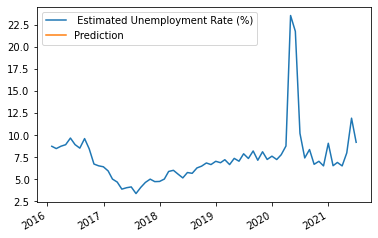

In [31]:
pd.concat([df[' Estimated Unemployment Rate (%)'],forecast_df],axis=1).plot()

In [32]:
forecast1=model.predict(n_periods=12, return_conf_int=True)

In [33]:
forecast1

(array([11.1221239 ,  8.92749992,  8.16887355,  8.30395034,  8.27309635,
         8.00730337,  7.80755044,  7.73901852,  7.70683187,  7.66275692,
         7.62117667,  7.59577113]), array([[ 6.81993342, 15.42431437],
        [ 3.07472386, 14.78027597],
        [ 2.08196753, 14.25577957],
        [ 2.17688345, 14.43101723],
        [ 2.09552749, 14.4506652 ],
        [ 1.77956066, 14.23504608],
        [ 1.55772765, 14.05737323],
        [ 1.48193661, 13.99610043],
        [ 1.445979  , 13.96768474],
        [ 1.39925407, 13.92625978],
        [ 1.35617338, 13.88617996],
        [ 1.33008695, 13.86145531]]))

In [34]:
forecast_range=pd.date_range(start='2021-05-31', periods=12,freq='M')

In [35]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

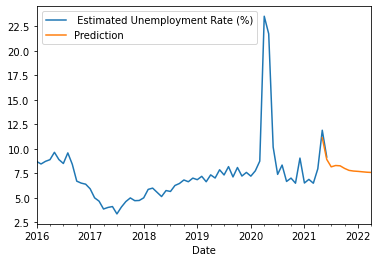

In [36]:
pd.concat([df[' Estimated Unemployment Rate (%)'],forecast1_df],axis=1).plot()

In [37]:
lower=pd.Series(forecast1[1][:, 0], index =forecast_range)
upper=pd.Series(forecast1[1][:, 1], index =forecast_range)

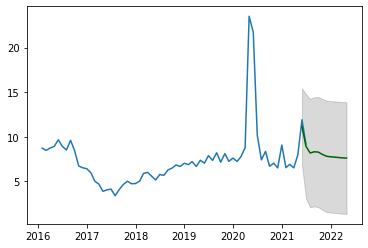

In [38]:
plt.plot(df[' Estimated Unemployment Rate (%)'])
plt.plot(forecast1_df, color='darkgreen')
plt.fill_between(forecast_range, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)

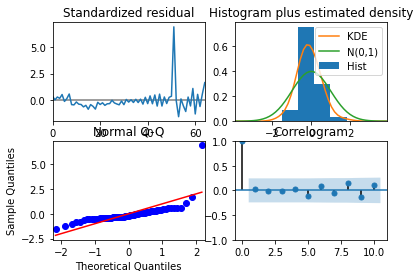

In [39]:
out=model.plot_diagnostics()

In [31]:
##fbprophet

In [42]:
df = df.reset_index()

In [44]:
Confirmed = df[['Date',' Estimated Unemployment Rate (%)']].rename({'Date':'ds',' Estimated Unemployment Rate (%)':'y'})

In [46]:
Confirmed.columns = ['ds','y']

In [47]:
Confirmed.head()

,ds,y
0,2016-01-31,8.72
1,2016-02-29,8.46
2,2016-03-31,8.73
3,2016-04-30,8.90
4,2016-05-31,9.65


In [48]:
train_proph = Confirmed[Confirmed['ds'] < '2021-05-31']

In [49]:
test_proph = Confirmed[Confirmed['ds'] >= '2021-05-31']

In [50]:
from fbprophet import Prophet
m = Prophet(interval_width=0.9,yearly_seasonality=True)

In [51]:
m.fit(train_proph)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
future = m.make_future_dataframe(periods=12)


In [59]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
71,2021-05-08,33.257178,37.858291,28.957620
72,2021-05-09,32.680867,37.140615,28.334068
73,2021-05-10,31.383467,35.938054,26.829206
74,2021-05-11,29.427423,33.877972,24.921555
75,2021-05-12,26.893112,31.331415,22.156083


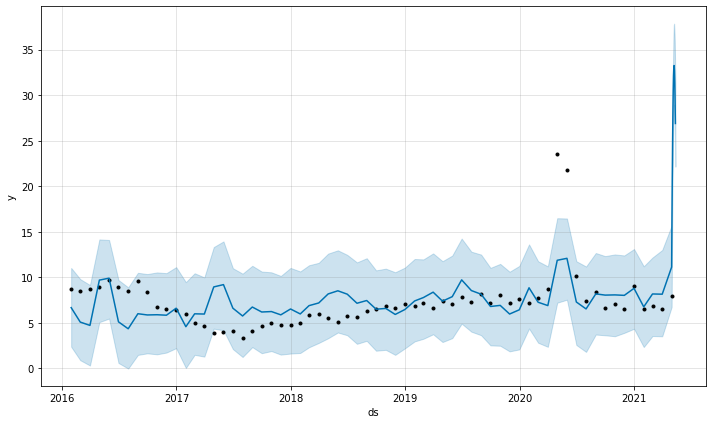

In [60]:
confirmed_forecast_plot = m.plot(forecast)


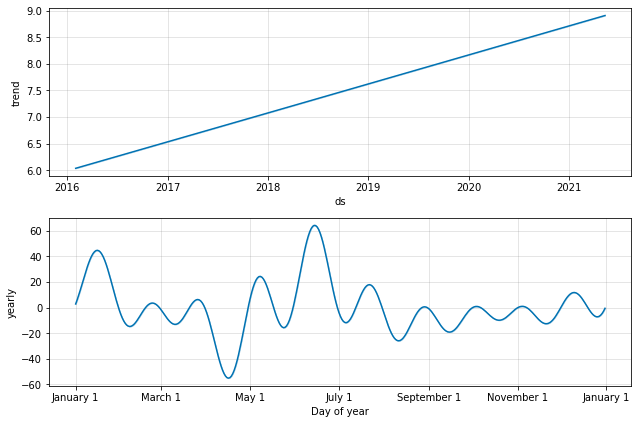

In [61]:
#plot components of forecast
confirmed_forecast_plot =m.plot_components(forecast)

In [62]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)